In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel("./Data_Train.xlsx")
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [3]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
train_data.info()
# DataFrame.info() without any arguments prints information about 
# a DataFrame including the index dtype and columns, non-null values, 
# and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data["Route"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Route, Length: 10683, dtype: bool

In [8]:
train_data["Route"].isnull().sum()

1

In [9]:
train_data[train_data["Route"].isnull()]
#NaN not avaialble number

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
train_data.dropna(inplace=True)
#Inplace Parameter: By default, dropna() does not modify the original DataFrame;
# it returns a new DataFrame with the NaN values dropped. If you want to modify 
# the original DataFrame, use inplace=True.

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
# Basic Usage: DataFrame.info() without any arguments prints information about a
# DataFrame including the index dtype and columns, non-null values, and memory usage.

# memory_usage Parameter: When set to "deep", info(memory_usage="deep") calculates 
# the memory footprint of each element in the DataFrame, which can give you a more 
# accurate representation of the actual memory usage, especially for object columns 
# that store strings or mixed types.

# Why "Deep"? In regular memory usage calculation (memory_usage="True"), pandas only 
# considers the top-level memory consumption without looking into the actual content 
# of object dtype columns. This often underestimates the memory usage because the actual 
# objects are stored elsewhere in memory. The "deep" option accounts for this by 
# introspecting the data deeply.

# df = pd.DataFrame({
#     'A': [1, 2, 3],
#     'B': ['one', 'two', 'three']
# })

# # Getting detailed memory usage information
# df.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3 entries, 0 to 2
# Data columns (total 2 columns):
#  #   Column  Non-Null Count  Dtype 
# ---  ------  --------------  ----- 
#  0   A       3 non-null      int64 
#  1   B       3 non-null      object
# dtypes: int64(1), object(1)
# memory usage: 180.0+ bytes


# df.info(memory_usage="deep")
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3 entries, 0 to 2
# Data columns (total 2 columns):
#  #   Column  Non-Null Count  Dtype 
# ---  ------  --------------  ----- 
#  0   A       3 non-null      int64 
#  1   B       3 non-null      object
# dtypes: int64(1), object(1)
# memory usage: 338.0 bytes

In [13]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [14]:
data=train_data.copy()

In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
def change_object_data_type_to_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [17]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_object_data_type_to_datetime(feature)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [21]:
data['journey_day']=data["Date_of_Journey"].dt.day

In [22]:
data['journey_year']=data["Date_of_Journey"].dt.year
data['journey_month']=data["Date_of_Journey"].dt.month

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  journey_day      10682 non-null  int32         
 12  journey_year     10682 non-null  int32         
 13  journey_month    10682 non-null  int32         
dtypes: datetime64[ns](3), int32(3), int64(1), o

In [24]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,2019,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-04 05:50:00,2024-04-04 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,2019,6


In [25]:
data["Arival_Time_hours"]=data["Arrival_Time"].dt.hour
data["Arival_Time_minutes"]=data["Arrival_Time"].dt.minute
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Dep_Time             10682 non-null  datetime64[ns]
 6   Arrival_Time         10682 non-null  datetime64[ns]
 7   Duration             10682 non-null  object        
 8   Total_Stops          10682 non-null  object        
 9   Additional_Info      10682 non-null  object        
 10  Price                10682 non-null  int64         
 11  journey_day          10682 non-null  int32         
 12  journey_year         10682 non-null  int32         
 13  journey_month        10682 non-null 

In [26]:
 # 14  Arival_Time_hours    10682 non-null  int32         
 # 15  Arival_Time_minutes  10682 non-null  int32         

In [27]:
data["Dep_Time_hours"]=data["Dep_Time"].dt.hour
data["Dep_Time_minutes"]=data["Dep_Time"].dt.minute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Dep_Time             10682 non-null  datetime64[ns]
 6   Arrival_Time         10682 non-null  datetime64[ns]
 7   Duration             10682 non-null  object        
 8   Total_Stops          10682 non-null  object        
 9   Additional_Info      10682 non-null  object        
 10  Price                10682 non-null  int64         
 11  journey_day          10682 non-null  int32         
 12  journey_year         10682 non-null  int32         
 13  journey_month        10682 non-null 

In [28]:
cols_to_drop=["Arrival_Time",'Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   journey_day          10682 non-null  int32         
 10  journey_year         10682 non-null  int32         
 11  journey_month        10682 non-null  int32         
 12  Arival_Time_hours    10682 non-null  int32         
 13  Arival_Time_minutes  10682 non-null 

In [30]:
data.shape

(10682, 16)

In [31]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,2019,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,21,35,16,50


In [32]:
def convert_into_day_periods(x):
    if (x>4) and (x<=8):
        return "early morning"
    elif (x>8) and (x<=12):
        return "morning"
    elif (x>12) and (x<=16):
        return "afternoon"
    elif (x>16) and (x<=22):
        return "evening"
    else:
        return "night"

In [33]:
data["Dep_Time_hours"].apply(convert_into_day_periods)

0              evening
1        early morning
2              morning
3              evening
4            afternoon
             ...      
10678          evening
10679          evening
10680    early morning
10681          morning
10682          morning
Name: Dep_Time_hours, Length: 10682, dtype: object

In [34]:
data["Dep_Time_hours"].apply(convert_into_day_periods).value_counts()

Dep_Time_hours
evening          3236
early morning    2880
morning          2209
afternoon        1731
night             626
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hours'>

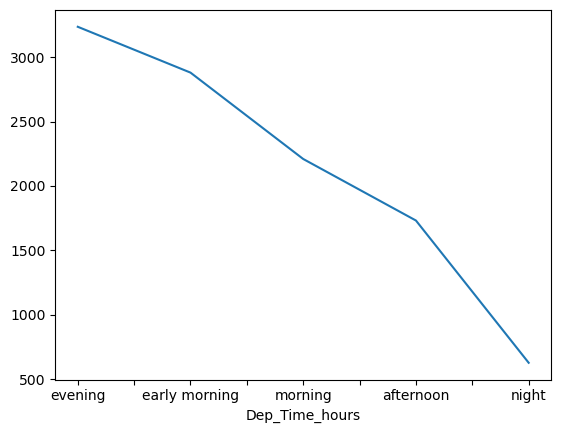

In [35]:
data["Dep_Time_hours"].apply(convert_into_day_periods).value_counts().plot()

<Axes: xlabel='Dep_Time_hours'>

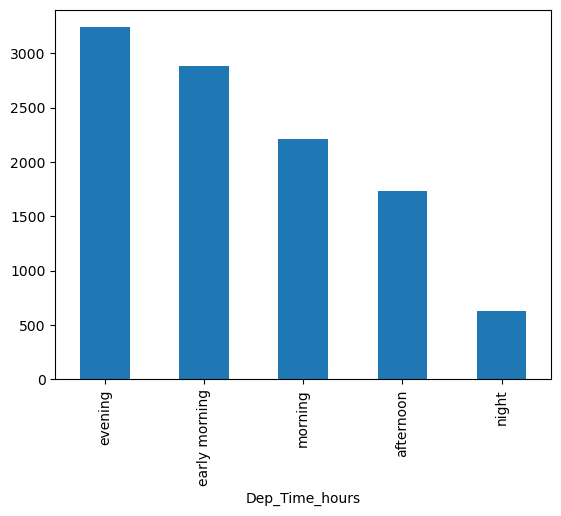

In [36]:
data["Dep_Time_hours"].apply(convert_into_day_periods).value_counts().plot(kind="bar")

In [37]:
!pip install plotly
!pip install chart_stu

ERROR: Could not find a version that satisfies the requirement chart_stu (from versions: none)
ERROR: No matching distribution found for chart_stu


In [38]:
import plotly
!pip install cufflinks

In [39]:
import cufflinks as clfk

In [40]:
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
clfk.go_offline()

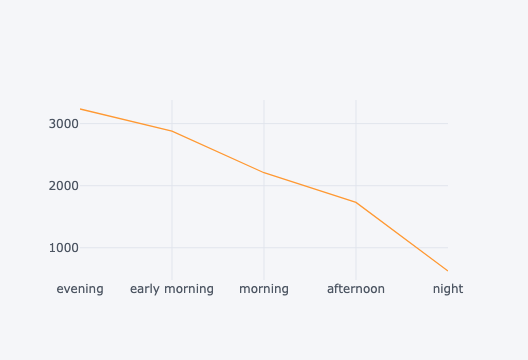

In [41]:
data["Dep_Time_hours"].apply(convert_into_day_periods).value_counts().iplot()

In [42]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,2019,6,4,25,9,25


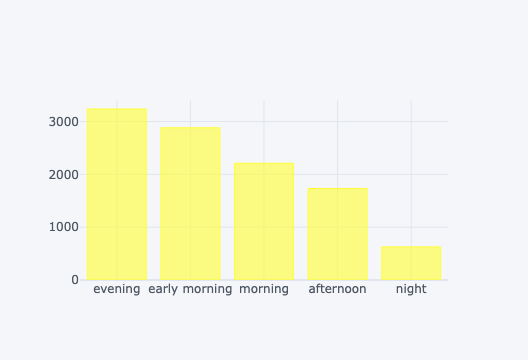

In [43]:
data["Dep_Time_hours"].apply(convert_into_day_periods).value_counts().iplot(kind="bar", color="yellow")

In [44]:
def preprocess_duration(x):
    if 'h' not in x:
        x = f"0h {x}"
    elif 'm' not in x:
        x = f"{x} 0m"
    return x

In [45]:
data["Duration"]=data["Duration"].apply(preprocess_duration)

In [46]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,4,25,9,25


In [47]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,2019,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,4,25,9,25


In [48]:
data["Duration_hours"]=data["Duration"].apply(lambda x : int(x.split(" ")[0][0:-1]))
data["Duration_minutes"]=data["Duration"].apply(lambda x : int(x.split(" ")[1][0:-1]))

In [49]:
data["Duration_hours"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10682, dtype: int64

In [50]:
data["Duration_minutes"]

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_minutes, Length: 10682, dtype: int64

In [51]:
data["Duration"]=data["Duration"].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [52]:
data["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

<Axes: xlabel='Duration', ylabel='Price'>

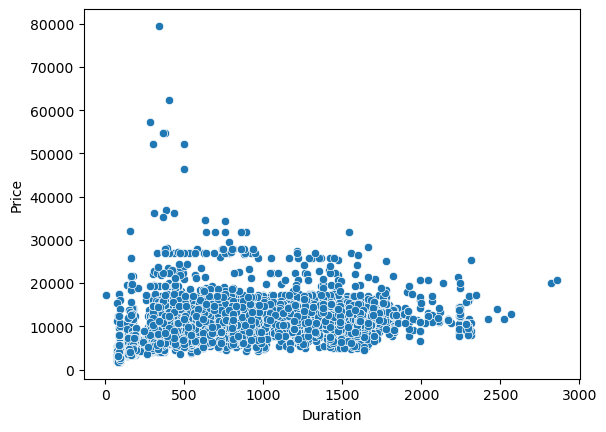

In [53]:
sns.scatterplot(x="Duration", y="Price", data=data)

In [54]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_year,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,2019,3,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,2019,5,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,2019,6,4,25,9,25,19,0


<Axes: xlabel='Duration', ylabel='Price'>

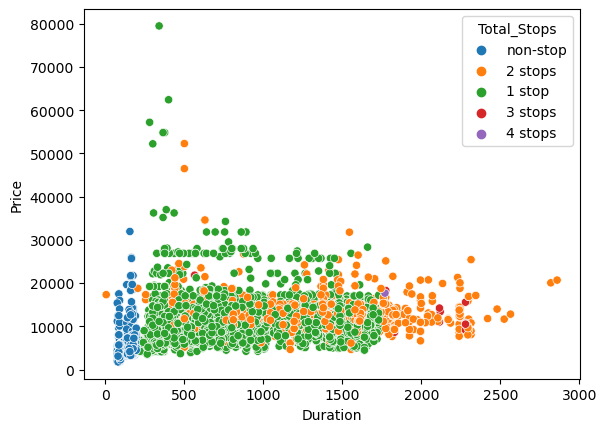

In [55]:
sns.scatterplot(x="Duration", y="Price", hue="Total_Stops", data=data)

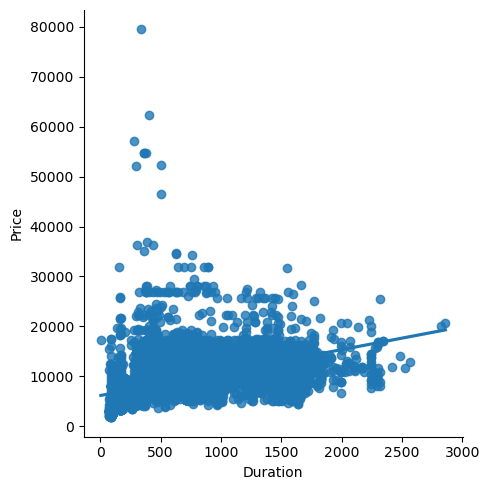

In [56]:
sns.lmplot(x="Duration", y="Price", data=data)
# if he slope of the regression line is 0.6, that means, if the duration increses by 
# 100 units, the price increases by 60 units.
#as the duration increases, the price increases(the regression line tells us that..)

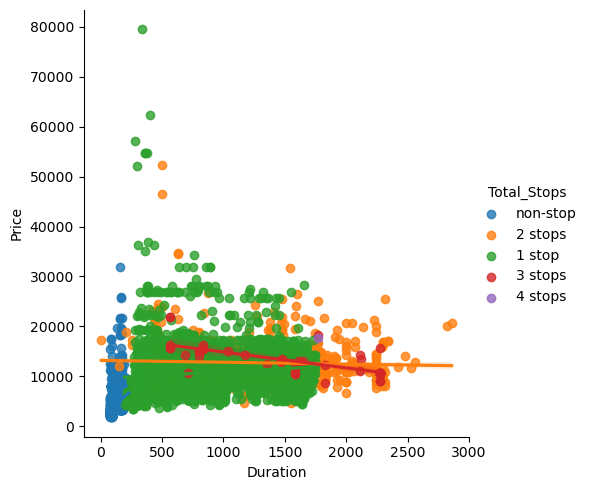

In [57]:
sns.lmplot(x="Duration", y="Price", hue="Total_Stops", data=data)
# here in 2 stops, as the time increases, the price is constant.
# in 3 stops, as the time increases, the price decreases
# in 1 stop, as time increases, price increasing

In [58]:
#on which route jet airways is extremely used

data[data["Airline"]=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [59]:
#Airline vs Price Analysis
#min price, mx prics, 25th percentile, Median(50th percentile), mean, 75th percentile
#max
# when they ask all these percentiles, BOXPLOT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

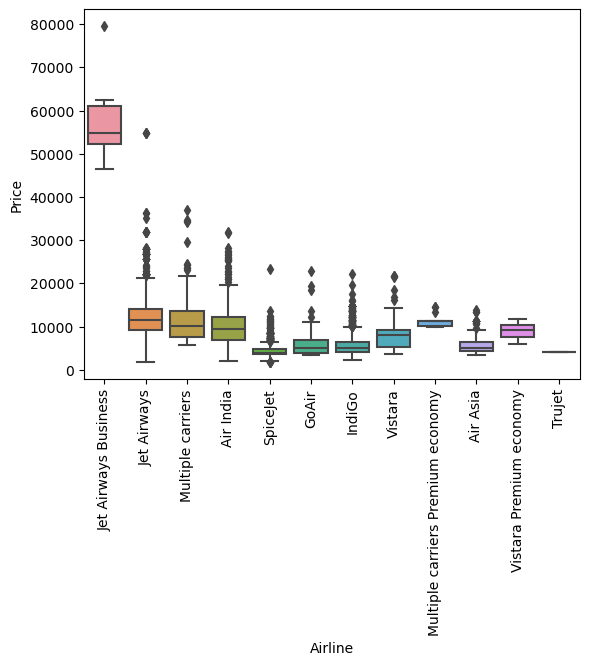

In [60]:
sns.boxplot(y="Price", x="Airline", data=data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")

In [61]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]
num_col=[col for col in data.columns if data[col].dtype != "object"]

In [62]:
cat_col, num_col

(['Airline',
  'Source',
  'Destination',
  'Route',
  'Total_Stops',
  'Additional_Info'],
 ['Date_of_Journey',
  'Duration',
  'Price',
  'journey_day',
  'journey_year',
  'journey_month',
  'Arival_Time_hours',
  'Arival_Time_minutes',
  'Dep_Time_hours',
  'Dep_Time_minutes',
  'Duration_hours',
  'Duration_minutes'])

In [63]:
#creating one hot encoding

In [64]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [65]:
for x in data["Source"].unique():
    data["Source_is_"+x]=data["Source"].apply(lambda y: 1 if y==x else 0)

In [66]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0


In [67]:
data["Airline"].unique()
data["Airline"].nunique()#12

12

In [68]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0


In [69]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [70]:
 airlines=data. groupby(['Airline'])['Price'].mean().sort_values().index

In [71]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
dict_airlines={key:index for index, key in enumerate(airlines,0)}

In [73]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
data['Airline']=data['Airline'].map(dict_airlines)

In [75]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [76]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,9,25,19,0,0,0,1,0,0


In [77]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [78]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [79]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [80]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [81]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [82]:
dict_dest={key:index for index,key in enumerate(dest,0)}

In [83]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [84]:
data['Destination']=data['Destination'].map(dict_dest)

In [85]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,non-stop,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0


In [86]:
#22

In [87]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [88]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [89]:
stop

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [90]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [91]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,0,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0


In [92]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_year', 'journey_month', 'Arival_Time_hours',
       'Arival_Time_minutes', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Duration_hours', 'Duration_minutes', 'Source_is_Banglore',
       'Source_is_Kolkata', 'Source_is_Delhi', 'Source_is_Chennai',
       'Source_is_Mumbai'],
      dtype='object')

In [93]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [94]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_year', 'journey_month', 'Arival_Time_hours',
       'Arival_Time_minutes', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Duration_hours', 'Duration_minutes', 'Source_is_Banglore',
       'Source_is_Kolkata', 'Source_is_Delhi', 'Source_is_Chennai',
       'Source_is_Mumbai'],
      dtype='object')

In [95]:
data['journey_year'].value_counts()

journey_year
2019    10682
Name: count, dtype: int64

In [96]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_year', 'journey_month', 'Arival_Time_hours',
       'Arival_Time_minutes', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Duration_hours', 'Duration_minutes', 'Source_is_Banglore',
       'Source_is_Kolkata', 'Source_is_Delhi', 'Source_is_Chennai',
       'Source_is_Mumbai'],
      dtype='object')

In [97]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,0,No info,3897,24,...,10,22,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,445,2,No info,7662,1,...,15,5,50,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,1140,2,No info,13882,9,...,25,9,25,19,0,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,325,1,No info,6218,12,...,30,18,5,5,25,0,1,0,0,0
4,3,2019-03-01,Banglore,2,BLR → NAG → DEL,285,1,No info,13302,1,...,35,16,50,4,45,1,0,0,0,0


In [98]:
data.shape

(10682, 23)

In [99]:
data.drop(columns=['Date_of_Journey', 'Source', 'Route', 'Additional_Info', 'Duration', 'journey_year'], axis=1, inplace=True)

In [100]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Arival_Time_hours,Arival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_minutes,Source_is_Banglore,Source_is_Kolkata,Source_is_Delhi,Source_is_Chennai,Source_is_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0


In [101]:
def plot(df, col):
    fig, (ax1, ax2, ax3)= plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1, kde=False)# kde(kernal density estimation)for the line
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3)

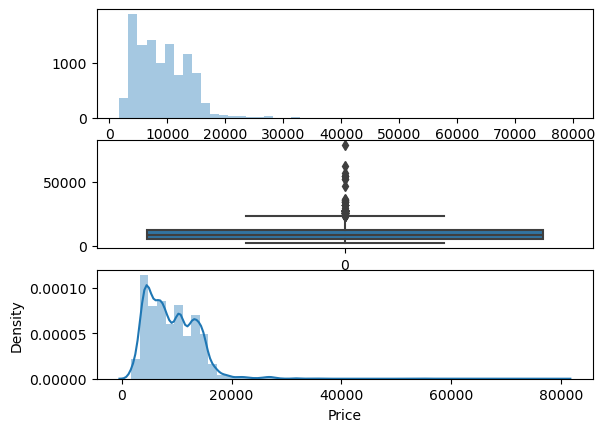

In [102]:
plot(data, 'Price')

In [103]:
q1= data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)

iqr=q3-q1

maximum=q3+1.5*iqr
minimum=q1-1.5*iqr
print(maximum)
print(minimum)

23017.0
-5367.0


In [104]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [105]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

I got a requirement from the manager saying, if the outlier is > 35,000 (not calculated amount), replace it with median
I can use numpy package and use "where" to replace
>>> a = np.arange(10)
>>> a
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> np.where(a < 5, a, 10*a)
array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [106]:
data['Price']=np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

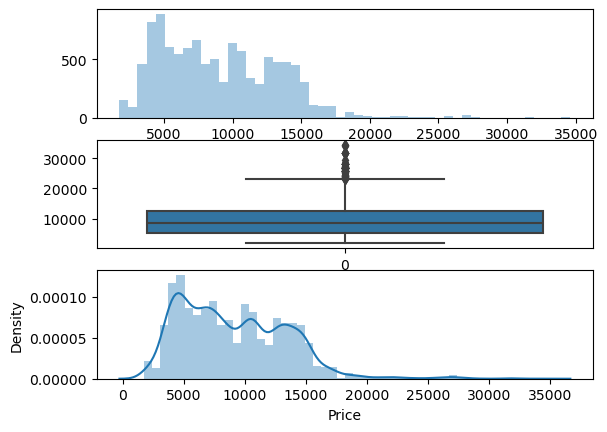

In [107]:
plot(data, 'Price')

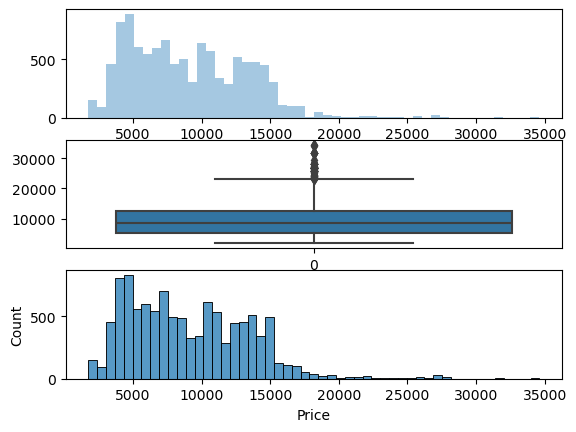

In [108]:
#I tried hist plot

def plot(df, col):
    fig, (ax1, ax2, ax3)= plt.subplots(3,1)
    sns.distplot(df[col], ax=ax1, kde=False)# kde(kernal density estimation)for the line
    sns.boxplot(df[col], ax=ax2)
    sns.histplot(df[col], ax=ax3)
plot(data, 'Price')

    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features


In [109]:
x=data.drop(['Price'], axis=1)

In [110]:
y=data['Price']

In [111]:
from sklearn.feature_selection import mutual_info_regression

In [112]:
imp=mutual_info_regression(x,y)

In [113]:
imp

array([0.97367442, 0.99968686, 0.77982735, 0.22377634, 0.62026058,
       0.40718711, 0.3521202 , 0.34084277, 0.26587421, 0.46263729,
       0.34328443, 0.38334642, 0.45752551, 0.51914017, 0.13679013,
       0.19234038])

Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.


In [114]:
imp_df=pd.DataFrame(imp, index=x.columns)

In [115]:
imp_df

,0
Airline,0.973674
Destination,0.999687
Total_Stops,0.779827
journey_day,0.223776
journey_month,0.620261
Arival_Time_hours,0.407187
Arival_Time_minutes,0.352120
Dep_Time_hours,0.340843
Dep_Time_minutes,0.265874
Duration_hours,0.462637


In [116]:
imp_df.columns=['importance']

In [117]:
imp_df

,importance
Airline,0.973674
Destination,0.999687
Total_Stops,0.779827
journey_day,0.223776
journey_month,0.620261
Arival_Time_hours,0.407187
Arival_Time_minutes,0.352120
Dep_Time_hours,0.340843
Dep_Time_minutes,0.265874
Duration_hours,0.462637


In [118]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Destination,0.999687
Airline,0.973674
Total_Stops,0.779827
journey_month,0.620261
Source_is_Delhi,0.519140
Duration_hours,0.462637
Source_is_Kolkata,0.457526
Arival_Time_hours,0.407187
Source_is_Banglore,0.383346
Arival_Time_minutes,0.352120


In [119]:
#27

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rf_model=RandomForestRegressor()

In [124]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [125]:
y_pred=rf_model.predict(x_test)

In [126]:
y_pred

array([16805.07,  5381.93,  8727.7 , ...,  3528.83,  6408.73,  6862.88])

In [127]:
from sklearn import metrics

In [128]:
metrics.r2_score(y_test, y_pred)

0.809358055553893

# dump the model/save the model

In [129]:
import pickle

In [130]:
file=open("/Users/meghnaperuri/Desktop/DS_PROJECTS/Flight_Price_resources/rf_model_file.pkl","wb")

In [131]:
pickle.dump(rf_model, file)

# trying to reach out to the pkl file to see if we can get our model to predict the values.

In [132]:
rf_model_from_pkl=open("/Users/meghnaperuri/Desktop/DS_PROJECTS/Flight_Price_resources/rf_model_file.pkl","rb")

In [133]:
random_forest_model=pickle.load(rf_model_from_pkl)

In [134]:
y_pred2=random_forest_model.predict(x_test)

In [135]:
metrics.r2_score(y_test, y_pred2)

0.809358055553893

## 15. How to automate ml pipeline & How to define your Evaluation metric


#how to make our own metric

In [137]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [138]:
mape(y_test , y_pred)

13.211726873208413

### b. How to automate ml pipeline !

'''
    Lets automate all the stuff..
    let say ,I will just pass ml algo & i get several results like--
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error
    from a single function
'''

In [141]:
from sklearn import metrics

In [143]:
def predict(ml_model):
    model = ml_model.fit(x_train , y_train)
    print('Training score : {}'.format(model.score(x_train , y_train)))
    y_predection = model.predict(x_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9516338404713767
predictions are : [16837.97  5488.83  8809.09 ...  3498.12  6225.48  6944.97]


r2 score : 0.8074420234374059
MAE : 1183.8202094471317
MSE : 3748641.600105861
RMSE : 1936.1409039906835
MAPE : 13.271134375887373


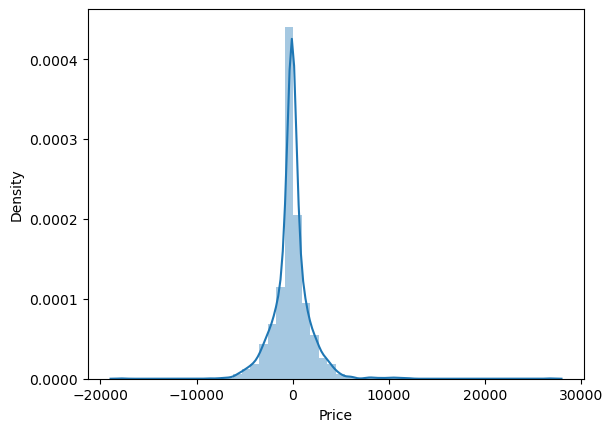

In [144]:
predict(RandomForestRegressor())

In [145]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score : 0.6817066823981033
MAE : 1407.614975664545
MSE : 6196406.883255335
RMSE : 2489.2582998265434
MAPE : 15.59603521048166


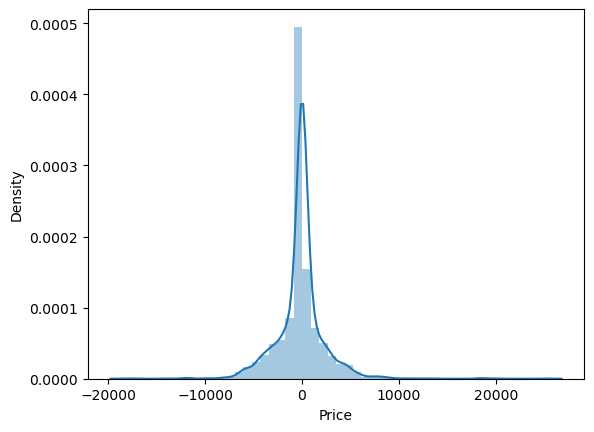

In [147]:
predict(DecisionTreeRegressor())

## 16.. how to hypertune ml model

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [150]:
np.linspace(start =100 , stop=1200 , num=6)#example to use linspace

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [157]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [158]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [159]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [160]:

## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [161]:
rf_random.fit(x_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [162]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [163]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=760)

In [164]:
rf_random.best_score_

0.8049901957121733